In [1]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import cv2
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [30]:
os.chdir(r'C:\Users\devan\machine learning data\Images')

In [ ]:
#bgr --> blue , green , red --> opencv
#rgb --> red , green , blue --> matplotlib

In [31]:
def get_image(path):
    im=cv2.imread(path)  
    im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  #color to gray img
    im=cv2.resize(im,(90,135),cv2.INTER_LINEAR)  #standard resize img
    i=im[0:100,:]
    return i

In [32]:
os.getcwd()

'C:\\Users\\devan\\machine learning data\\Images'

In [37]:
labels=[]   #assign the label to the images
images=[]
for i in ['1','2','3','4']:
    for p in enumerate(os.listdir(os.getcwd()+'\\'+i)):
        images.append(get_image(os.getcwd()+'\\'+i+'\\'+p[1]))
        labels.append(i)

In [38]:
images

[array([[ 45,  48,  55, ...,  64,  24,  39],
        [ 46,  45,  43, ...,  72,  24,  26],
        [ 45,  45,  43, ...,  66,  25,  29],
        ...,
        [ 93,  18,  20, ...,  14,  68, 117],
        [ 90,  27,  19, ...,  12,  69, 114],
        [ 93,  24,  22, ...,  13,  71, 123]], dtype=uint8),
 array([[193, 194, 180, ..., 161, 150, 151],
        [191, 191, 180, ..., 114,  95, 108],
        [194, 192, 181, ...,  94,  97, 107],
        ...,
        [ 53,  56,  61, ...,  49,  79, 160],
        [ 58,  55,  58, ...,  43,  74, 167],
        [ 58,  58,  55, ...,  39,  75, 166]], dtype=uint8),
 array([[203, 202, 204, ..., 102,  99,  91],
        [205, 204, 195, ..., 100, 100,  89],
        [206, 202, 204, ...,  85,  93,  95],
        ...,
        [ 50,  56, 112, ...,  66,  73, 115],
        [ 52,  63, 147, ...,  75,  67, 111],
        [ 57,  67, 184, ...,  65,  68, 122]], dtype=uint8),
 array([[164, 148, 168, ..., 159, 160, 158],
        [156,  57,  85, ..., 162, 162, 158],
        [157,  5

In [39]:
x_train=np.array(images)

In [42]:
x_train

array([[[ 45,  48,  55, ...,  64,  24,  39],
        [ 46,  45,  43, ...,  72,  24,  26],
        [ 45,  45,  43, ...,  66,  25,  29],
        ...,
        [ 93,  18,  20, ...,  14,  68, 117],
        [ 90,  27,  19, ...,  12,  69, 114],
        [ 93,  24,  22, ...,  13,  71, 123]],

       [[193, 194, 180, ..., 161, 150, 151],
        [191, 191, 180, ..., 114,  95, 108],
        [194, 192, 181, ...,  94,  97, 107],
        ...,
        [ 53,  56,  61, ...,  49,  79, 160],
        [ 58,  55,  58, ...,  43,  74, 167],
        [ 58,  58,  55, ...,  39,  75, 166]],

       [[203, 202, 204, ..., 102,  99,  91],
        [205, 204, 195, ..., 100, 100,  89],
        [206, 202, 204, ...,  85,  93,  95],
        ...,
        [ 50,  56, 112, ...,  66,  73, 115],
        [ 52,  63, 147, ...,  75,  67, 111],
        [ 57,  67, 184, ...,  65,  68, 122]],

       ...,

       [[201, 205, 204, ..., 124, 123, 123],
        [205, 205, 204, ..., 122, 121, 124],
        [205, 205, 204, ..., 123, 120, 121

In [43]:
x_train.shape

(380, 100, 90)

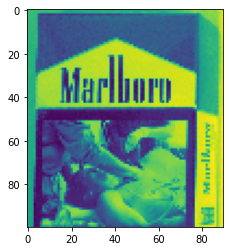

In [44]:
plt.imshow(x_train[12,:])

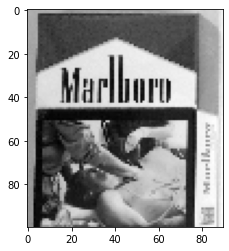

In [45]:
plt.imshow(x_train[12,:],cmap='gray')

In [46]:
pixels=x_train.flatten().reshape(380,9000)   #100*90 = 9000 matrix of same size
pixels.shape

(380, 9000)

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler=MinMaxScaler()
train=scaler.fit_transform(pixels)

In [49]:
train

array([[0.        , 0.01904762, 0.09174312, ..., 0.03791469, 0.27896996,
        0.50434783],
       [0.7047619 , 0.71428571, 0.66513761, ..., 0.16113744, 0.29613734,
        0.69130435],
       [0.75238095, 0.75238095, 0.77522936, ..., 0.28436019, 0.26609442,
        0.5       ],
       ...,
       [0.74285714, 0.76666667, 0.77522936, ..., 0.8056872 , 0.73390558,
        0.75652174],
       [0.78571429, 0.79047619, 0.74311927, ..., 0.82464455, 0.75965665,
        0.77391304],
       [0.78571429, 0.7952381 , 0.81651376, ..., 0.7535545 , 0.75965665,
        0.7826087 ]])

In [50]:
kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [52]:
data1=pd.DataFrame({'cluster':kmeans.labels_,'id':range(0,380)}) #380 is for number of images if you have different number of images then change this.

In [53]:
data1.head(10)

cluster  id
0        2   0
1        2   1
2        2   2
3        2   3
4        2   4
5        2   5
6        2   6
7        2   7
8        2   8
9        2   9

In [55]:
data1[(data1['cluster']==0)]   #having 0 value

cluster   id
32         0   32
239        0  239
271        0  271
272        0  272
273        0  273
274        0  274
275        0  275
276        0  276
277        0  277
300        0  300
333        0  333
334        0  334
335        0  335
337        0  337
338        0  338
339        0  339
342        0  342
343        0  343
344        0  344
345        0  345
346        0  346
347        0  347
349        0  349
350        0  350
352        0  352
353        0  353
355        0  355
356        0  356
357        0  357
358        0  358
359        0  359
361        0  361
363        0  363
364        0  364
365        0  365
366        0  366
368        0  368
369        0  369
370        0  370
371        0  371
374        0  374
375        0  375
376        0  376
377        0  377
378        0  378
379        0  379

In [56]:
clus_1=data1[(data1['cluster']==0)]

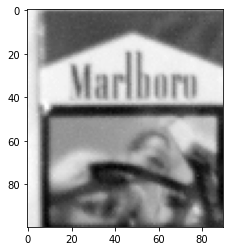

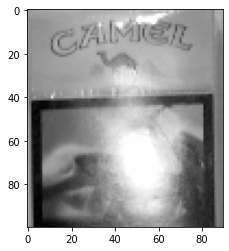

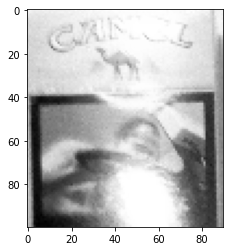

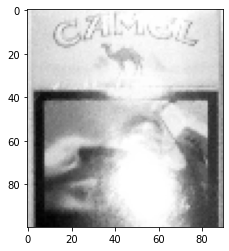

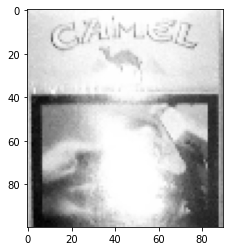

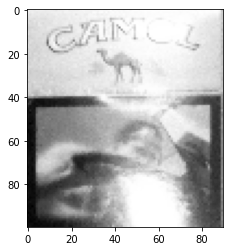

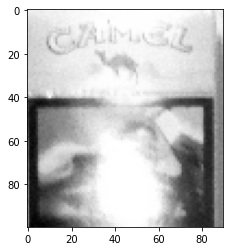

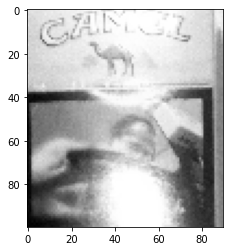

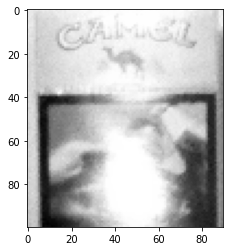

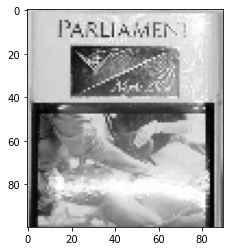

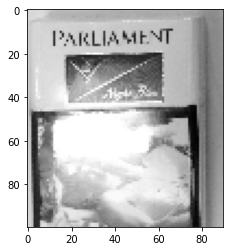

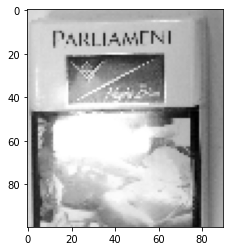

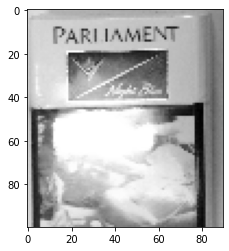

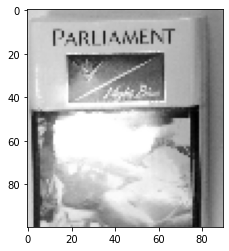

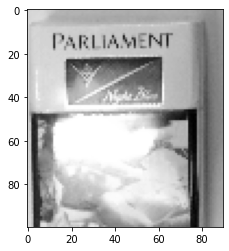

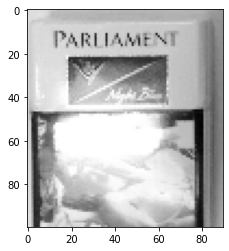

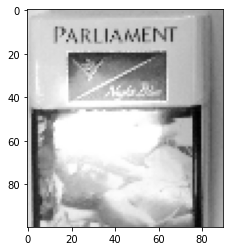

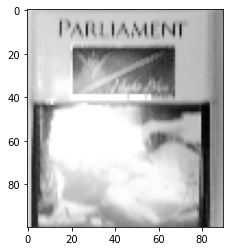

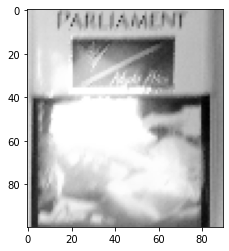

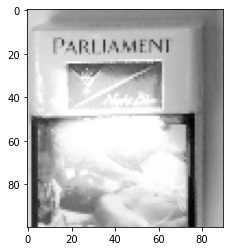

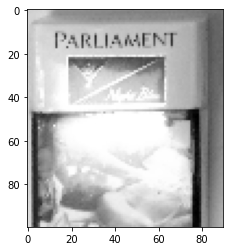

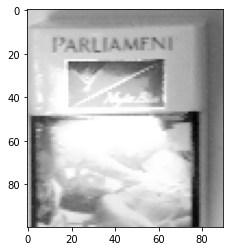

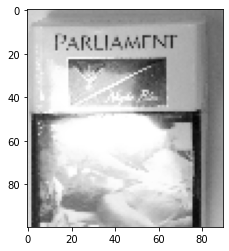

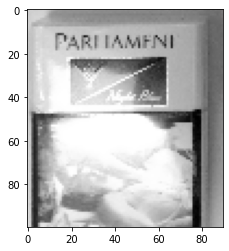

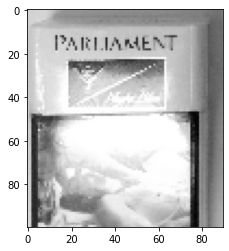

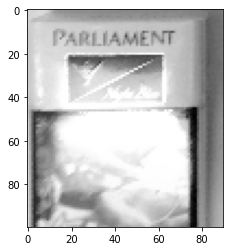

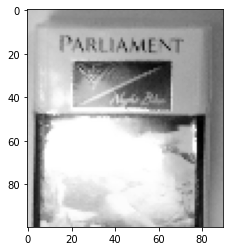

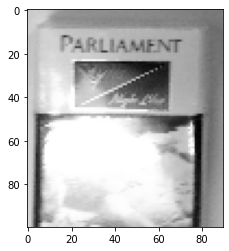

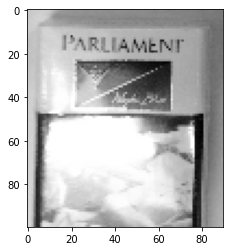

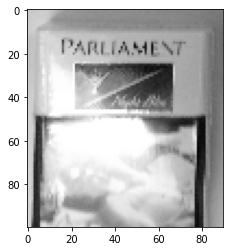

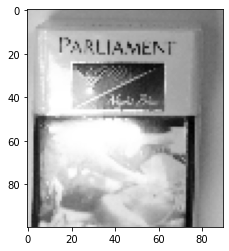

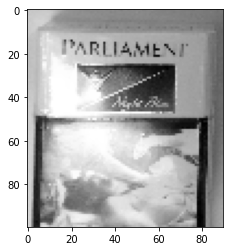

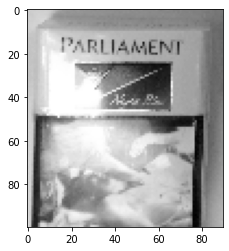

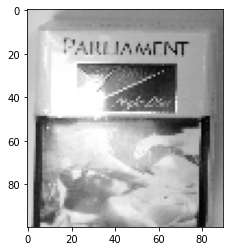

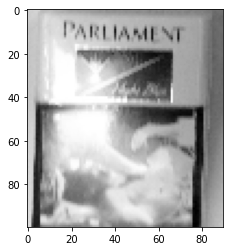

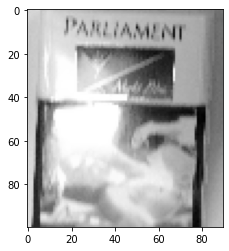

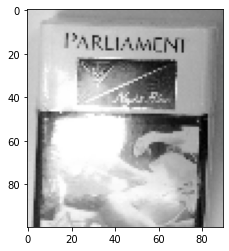

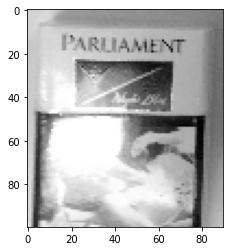

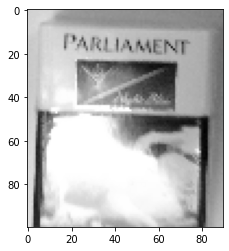

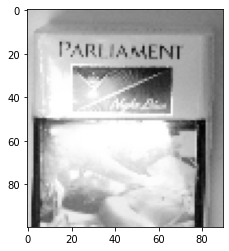

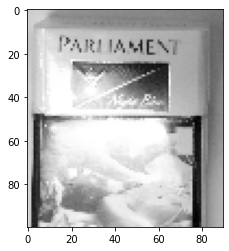

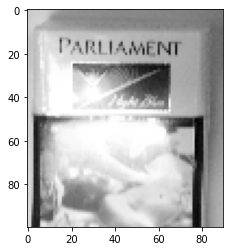

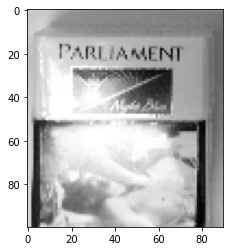

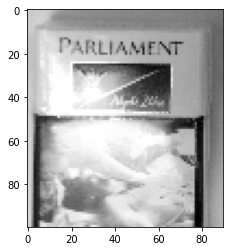

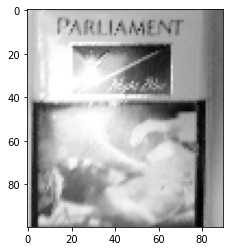

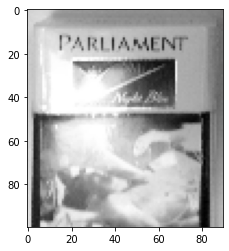

In [58]:
for i in clus_1.id:
    plt.imshow(x_train[i,:],cmap='gray')
    plt.show()
    
#all images of cluster 0
#other images are also coming .. so its not a great cluster

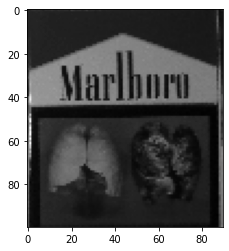

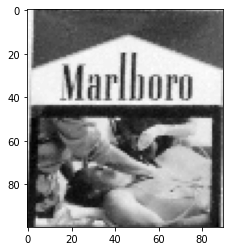

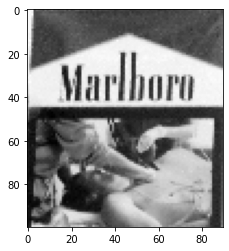

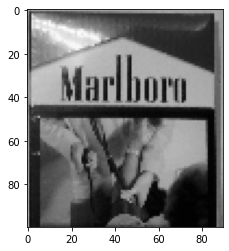

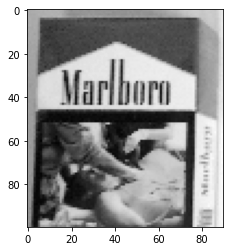

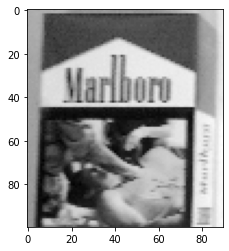

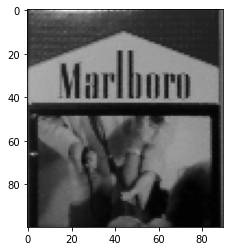

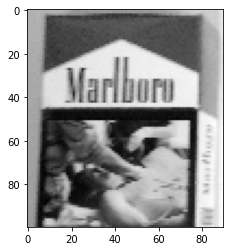

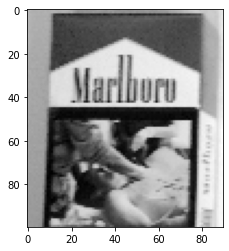

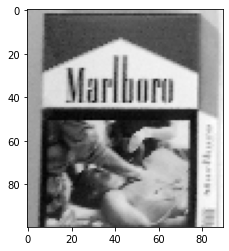

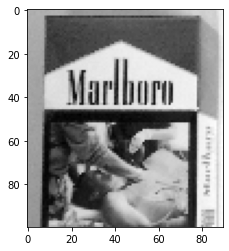

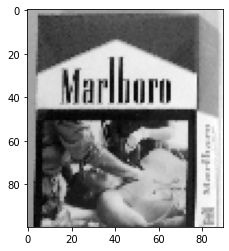

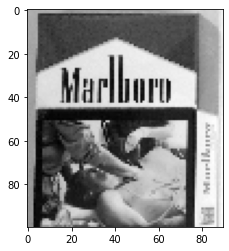

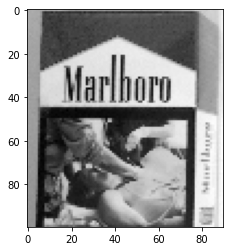

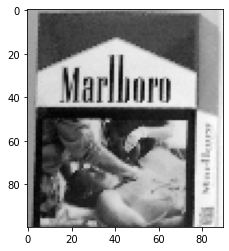

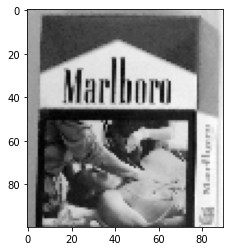

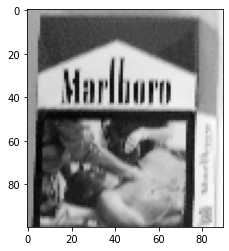

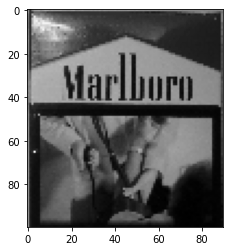

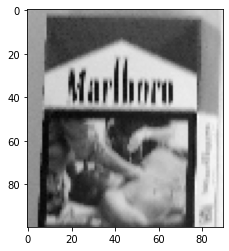

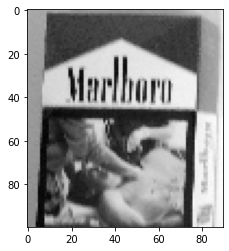

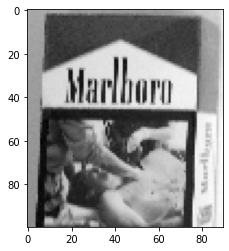

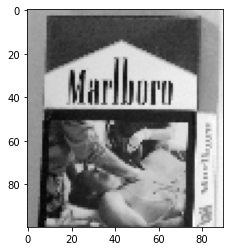

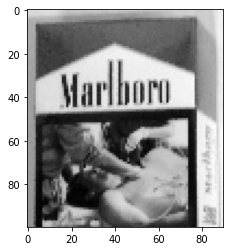

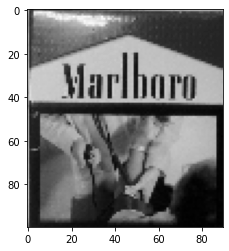

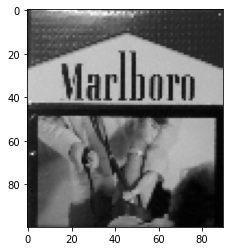

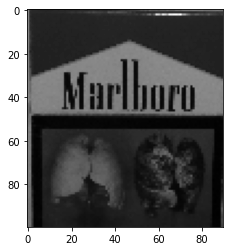

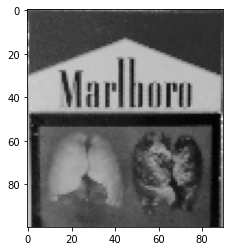

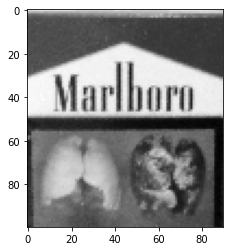

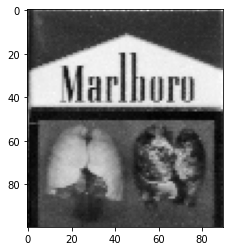

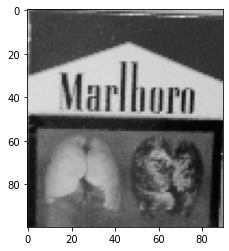

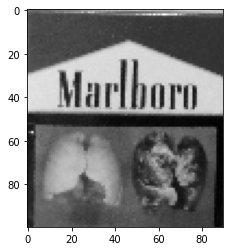

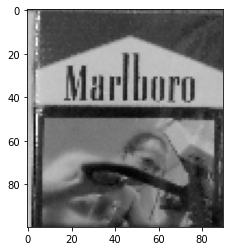

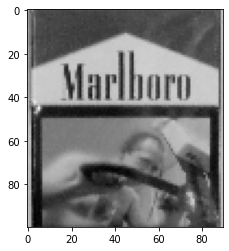

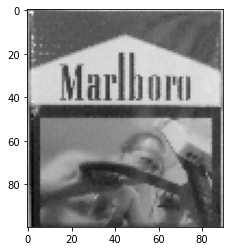

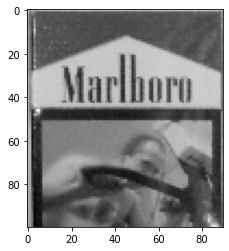

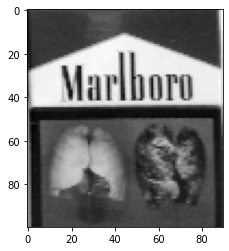

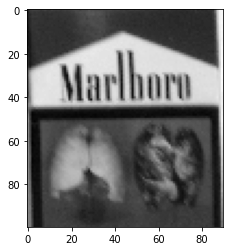

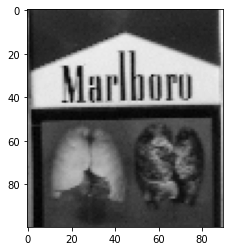

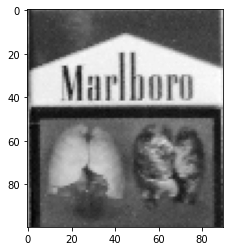

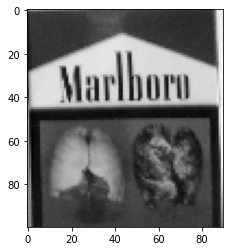

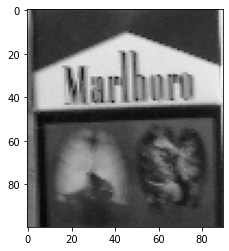

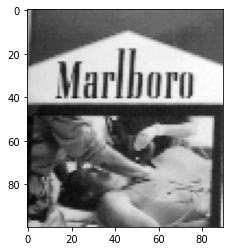

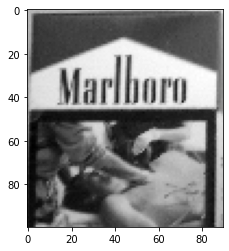

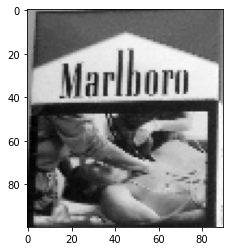

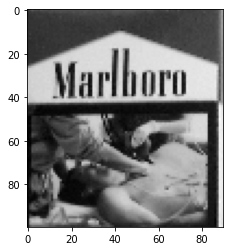

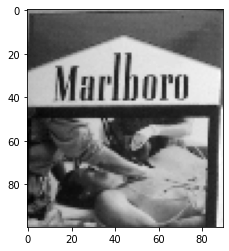

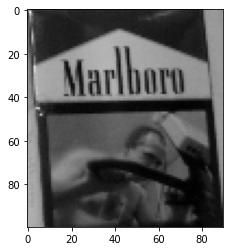

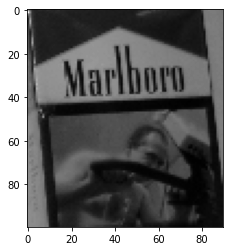

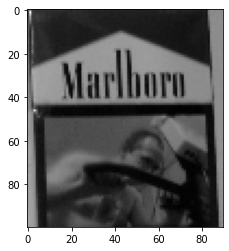

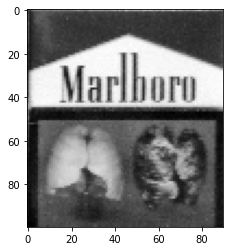

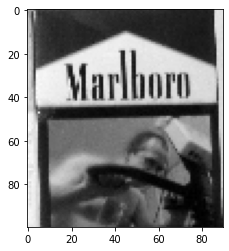

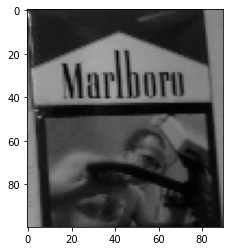

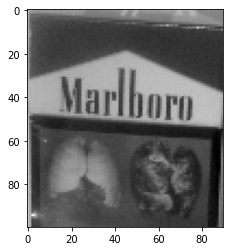

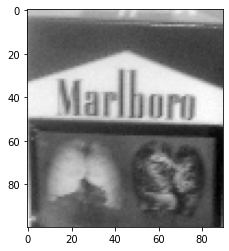

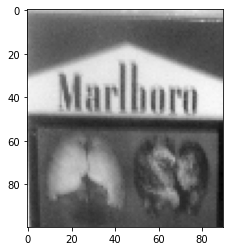

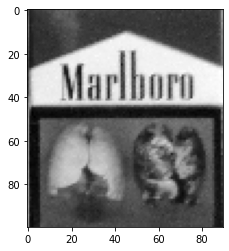

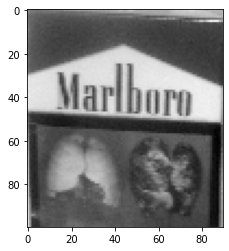

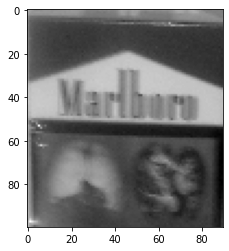

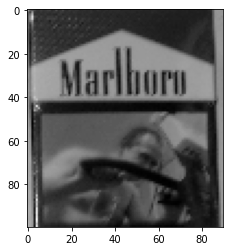

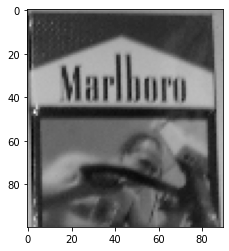

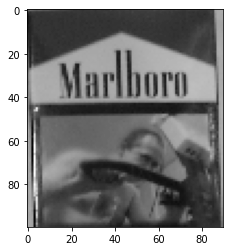

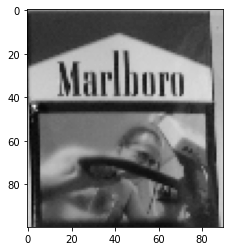

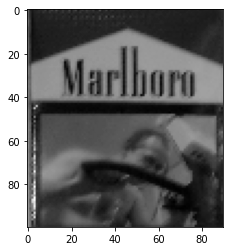

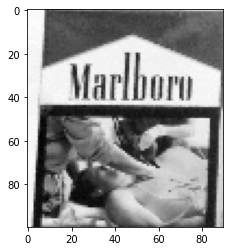

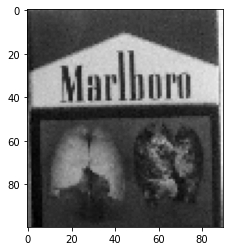

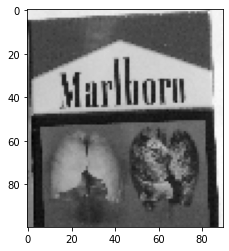

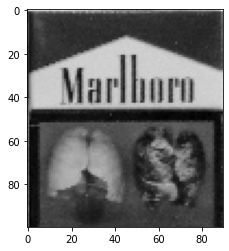

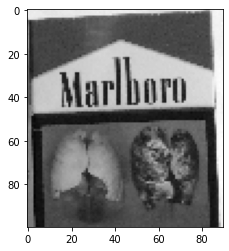

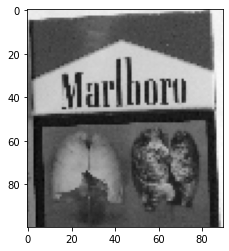

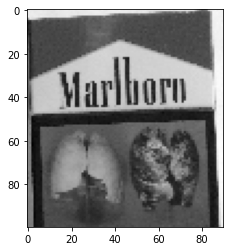

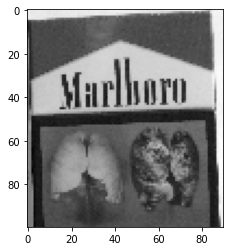

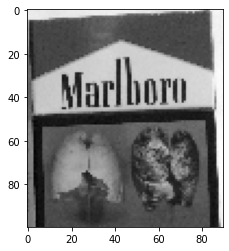

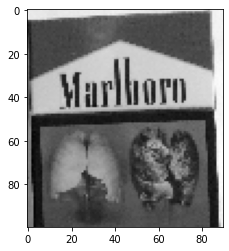

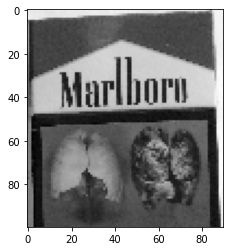

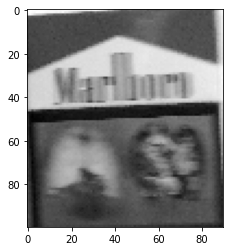

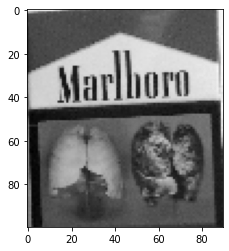

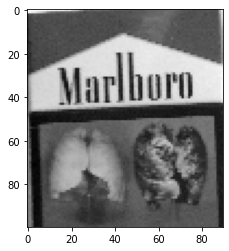

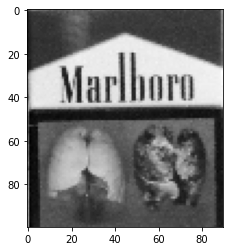

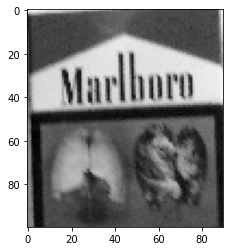

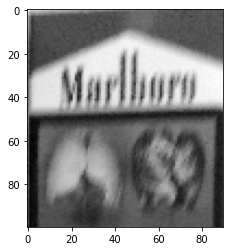

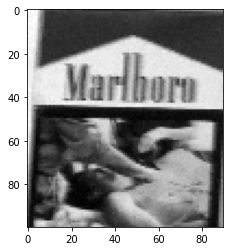

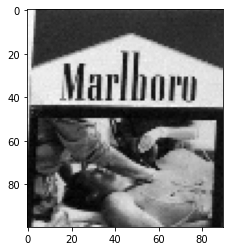

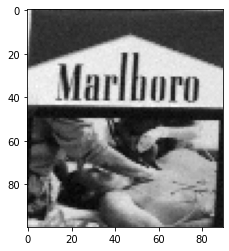

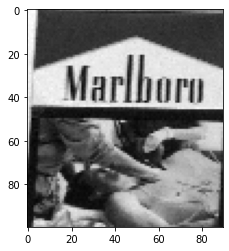

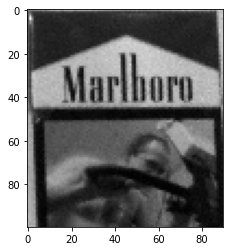

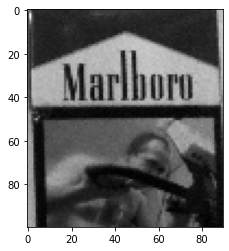

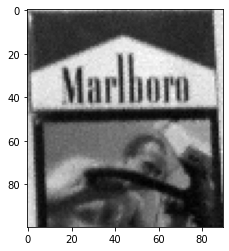

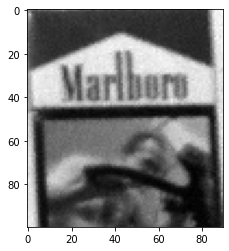

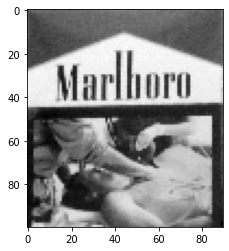

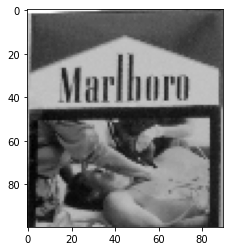

In [59]:
clus_1=data1[(data1['cluster']==2)]
for i in clus_1.id:
    plt.imshow(x_train[i,:],cmap='gray')
    plt.show()